In [2]:
# testing
import numpy as np
import importlib
import CI_Lindblad
importlib.reload(CI_Lindblad)
from matplotlib import pyplot as plt
from CI_Lindblad import CI_Lindblad


[chern_dyn] iter 250/250 | dt=5.000e-02 | itertime=6.340e-01s | total=1.632e+02s | alpha=1 | N=(17,17) | Chern=0.999879


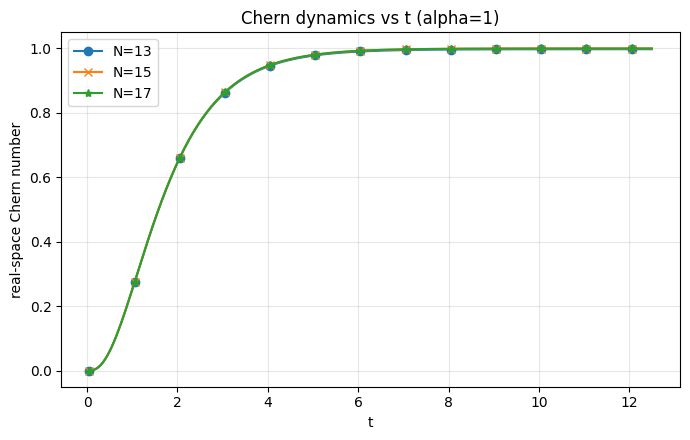

Saved: chern_dynamics_vs_time_alpha1_Ns13-15-17_decoh_on.pdf


In [ ]:
# ---------------------------
# 1) Chern dynamics vs time, (decoh on)
# ---------------------------
# Fixed alpha = 1, vary system size
N_list = (13, 15, 17)        
alpha  = 1.0
dt = 5e-2
max_steps = 250
solver = CI_Lindblad(Nx=N_list[0], Ny=N_list[0], alpha=alpha)  # any N here; method builds fresh per N
fname1 = solver.plot_chern_dynamics_vs_time(
    N_list=N_list, alpha=alpha, dt=dt, max_steps=max_steps,
    filename=f"chern_dynamics_vs_time_alpha{alpha:g}_Ns{'-'.join(map(str,N_list))}_decoh_on.pdf"
)
print("Saved:", fname1)

In [ ]:
# -----------------------------------------------
# 2) Steady-state Chern number vs alpha for N’s (decoh on)
# -----------------------------------------------
# Alpha in [0, 4]
alpha_list = np.linspace(0.0, 4.0, 81)
# Pick sizes
N_list = [11, 13, 15]
max_steps = 250
solver = CI_Lindblad(Nx=N_list[0], Ny=N_list[0], alpha=alpha_list[0])  # any N here; method builds fresh per N
fname2 = solver.plot_steady_chern_vs_alpha(
    N_list=N_list, alpha_list=alpha_list, dt=dt, max_steps=max_steps,
    filename=f"chern_steady_vs_alpha_0to4_steps{max_steps}_Ns{'-'.join(map(str,N_list))}_decoh_on.pdf"
)
print("Saved:", fname2)

[G_evolution] iter 20/250 | dt=5.000e-02 | itertime=4.005e-01s | total=7.649e+00s | alpha=0.9 | N=(15,15)


In [ ]:
# -------------------------------------------------------------------------
# 3) Steady-state correlation: fixed y, changing x for alpha = 1,2,3 (decoh on)
# -------------------------------------------------------------------------
# We'll compute C_G(rx, ry_fixed) at steady state for a single system size,
# and plot vs rx for each alpha with a legend on the same figure.


# Parameters
N = 17                       # system size
ry_fixed = 0                 # keep y separation fixed
rx_vals  = np.arange(0, N//2 + 1)   # plot half the torus
alphas   = [1.0, 2.0, 3.0]   # alphas to compare
dt = 5e-2
max_steps = 160

fig, ax = plt.subplots(figsize=(7, 4.5))

for a in alphas:
    # Initialize solver for this alpha
    solver = CI_Lindblad(Nx=N, Ny=N, alpha=a)
    
    # Evolve to steady state
    G_final, _ = solver.G_evolution(max_steps=max_steps, dt=dt, keep_history=False)
    
    # Compute correlator for rx_vals × {ry_fixed}
    # shape (len(rx_vals), 1), so flatten
    C_rx = solver.squared_two_point_corr(G_final, rx=rx_vals, ry=ry_fixed).reshape(-1)
    
    ax.plot(rx_vals, C_rx, marker='o', ms=3, lw=1, label=fr"$\alpha={a}$")

ax.set_xlabel(r"$r_x$")
ax.set_ylabel(fr"$C_G(r_x, r_y={ry_fixed})$")
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()

# Save as descriptive PDF
filename = f"corr2_vs_rx_fixed_ry{ry_fixed}_N{N}_alphas_{'-'.join(map(str, alphas))}_decoh_on.pdf"
fig.savefig(filename, bbox_inches="tight")
plt.close(fig)

print("Saved:", filename)

[G_evolution] iter 160/160 | dt=5.000e-02 | itertime=5.765e-01s | alpha=3 | N=(17,17)
Saved: corr2_vs_rx_fixed_ry0_N17_alphas_1.0-2.0-3.0_decoh_on.pdf


[chern_dyn] iter 250/250 | dt=5.000e-02 | itertime=6.124e+00s | total=1.680e+03s | alpha=1 | N=(31,31) | Chern=0.999153


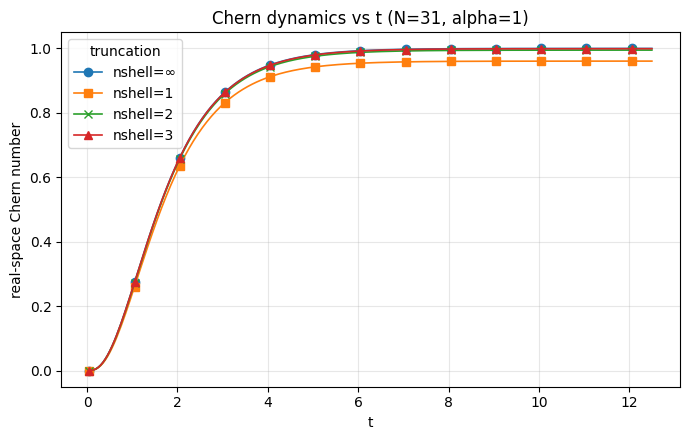

'/home/abhuiyan/Fermionic_Lindbladian/figs/chern_dynamics_nshell/chern_dyn_vs_time_N31_alpha1_nshells_inf-1-2-3_steps250_decoh_on.pdf'

In [ ]:
# Pick system size and physics parameters
N = 31
solver = CI_Lindblad(Nx=N, Ny=N, decoh=True, alpha=1.0, nshell=None)
solver.plot_chern_dynamics_vs_time_nshell(
    nshell_list=[None, 1, 2, 3],
    alpha=1.0,
    dt=5e-2,
    max_steps=250,
    filename=None         # saved under figs/chern_dynamics_nshell/
)

[chern_dyn] iter 250/250 | dt=5.000e-02 | itertime=4.235e-01s | total=7.586e+01s | alpha=1 | N=(21,21) | Chern=0.999841


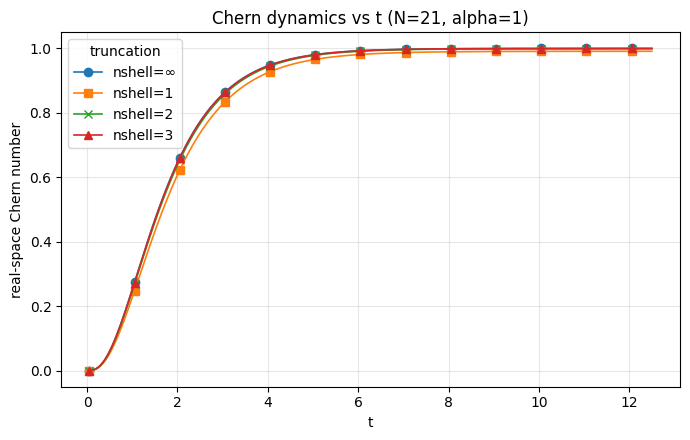

'/home/abhuiyan/Fermionic_Lindbladian/figs/chern_dynamics_nshell/chern_dyn_vs_time_N21_alpha1_nshells_inf-1-2-3_steps250_decoh_off.pdf'

In [9]:
# Pick system size and physics parameters (DECOH OFF)
N = 21
solver = CI_Lindblad(Nx=N, Ny=N, decoh=False, alpha=1.0, nshell=None)
solver.plot_chern_dynamics_vs_time_nshell(
    nshell_list=[None, 1, 2, 3],
    alpha=1.0,
    dt=5e-2,
    max_steps=250,
    filename=None         # saved under figs/chern_dynamics_nshell/
)

[G_evolution] iter 250/250 | dt=5.000e-02 | itertime=4.990e-02s | total=1.253e+01s | N=(11,11)


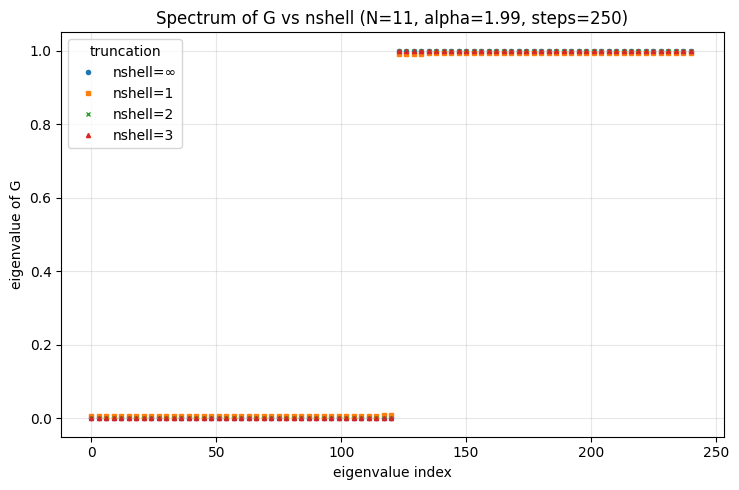

Saved: figs/spectrum_nshell/spectrum_G_vs_nshell_N11_alpha1.99_nshells_inf-1-2-3_steps250_decoh_on.pdf


In [ ]:

solver = CI_Lindblad(Nx=11, Ny=11, alpha_init=1.9, dt_init = 5e-2, decoh=True)
pdf = solver.plot_spectrum_vs_nshell(nshell_list=(None, 1, 2, 3))
print("Saved:", pdf)